In [1]:
!apt-get install -y tesseract-ocr
%pip install pytesseract

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pytesseract
import cv2
import numpy as np
import os
import easyocr
import matplotlib.pyplot as plt

reader = easyocr.Reader(['en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Image loaded and preprocessed successfully!


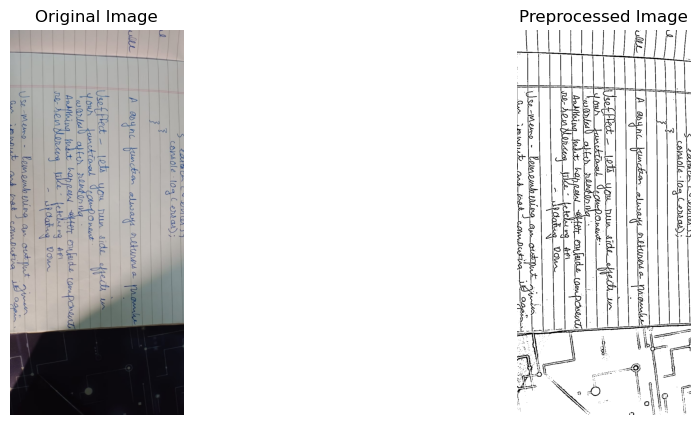

In [12]:
def preprocess_handwritten(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3,3), 0)
    binary = cv2.adaptiveThreshold(blur, 255, 
                                   cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                   cv2.THRESH_BINARY, 11, 2)
    return binary

image_path = 'test_image.jpg'
image_loaded = cv2.imread(image_path)

if image_loaded is not None:
    preprocessed_image = preprocess_handwritten(image_loaded)
    print("Image loaded and preprocessed successfully!")
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_loaded, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(preprocessed_image, cmap='gray')
    plt.title('Preprocessed Image')
    plt.axis('off')
    
   
else:
    print(f"Error: Could not load image from '{image_path}'")

In [6]:
def text_regions(image_data):
    detected_data = pytesseract.image_to_data(image_data, output_type=pytesseract.Output.DICT)
    return detected_data

In [7]:
def mark_text_regions(img, detected_boxes):
    output_img = img.copy()
    num_boxes = len(detected_boxes['level'])
    for i in range(num_boxes):
        if int(detected_boxes['conf'][i]) > 60:
            (x, y, width, height) = (detected_boxes['left'][i], detected_boxes['top'][i], detected_boxes['width'][i], detected_boxes['height'][i])
            cv2.rectangle(output_img, (x, y), (x + width, y + height), (0, 255, 0), 2)
    return output_img

In [8]:
def extract_text(detected_boxes):
    text_content = []
    num_boxes = len(detected_boxes['level'])
    for i in range(num_boxes):
        if int(detected_boxes['conf'][i]) > 60:
            text_content.append(detected_boxes['text'][i])
    return ' '.join(text_content)

Step 1: Image loaded


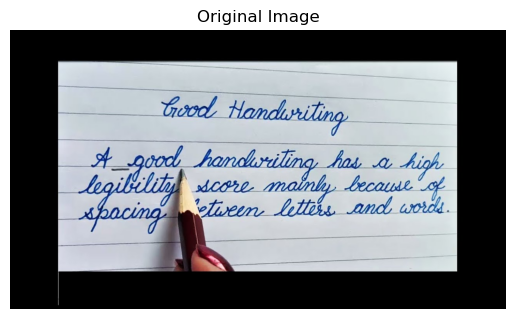

Step 2: Preprocessing done


c:\Users\uzair\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step 3: Text regions detected (EasyOCR)
Step 4: Bounding boxes marked


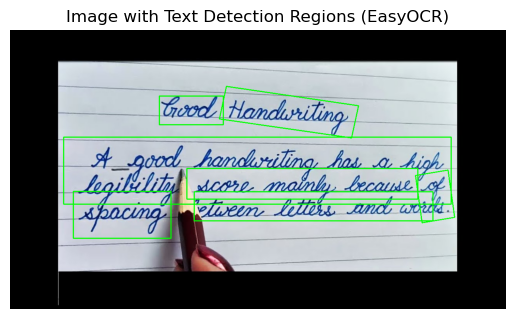

Step 5: OCR done

Detected Text: Gdod ~ozGio Jond omnoh Iacagt Llcohe_anaiml_becalule ~Apocina xfizeens_Ifbeis_pnd_Lrl Hodiulio d


In [11]:
import cv2
import matplotlib.pyplot as plt

img_path = "test_image2.jpg"
image_loaded = cv2.imread(img_path)

if image_loaded is None:
    print(f"Error: Unable to read the image file: {img_path}")
else:
    print("Step 1: Image loaded")
    plt.imshow(cv2.cvtColor(image_loaded, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")
    plt.show()

    preprocessed_image = preprocess_handwritten(image_loaded)
    print("Step 2: Preprocessing done")

    result = reader.readtext(preprocessed_image)
    print("Step 3: Text regions detected (EasyOCR)")

    text_boxes = image_loaded.copy()
    for (bbox, text, conf) in result:
        bbox = np.array(bbox).astype(int)
        cv2.polylines(text_boxes, [bbox], isClosed=True, color=(0, 255, 0), thickness=2)

    print("Step 4: Bounding boxes marked")
    plt.imshow(cv2.cvtColor(text_boxes, cv2.COLOR_BGR2RGB))
    plt.title("Image with Text Detection Regions (EasyOCR)")
    plt.axis("off")
    plt.show()

    extracted_text = ' '.join([text for (_, text, _) in result])
    print("Step 5: OCR done")
    print("\nDetected Text:", extracted_text)